In [1]:
#Autor: Alma
import pandas as pd
from datetime import datetime
import time

pd.set_option("expand_frame_repr", False)
df_gfi = pd.read_csv('gfi.csv',usecols=['created_at','repository_url'])
# df_other_iss= pd.read_csv('otheri_coll.csv',usecols=['created_at','repository_url'])
df_all_iss= pd.read_csv('all_issues_fin.csv',usecols=['created_at','repository_url'])
df_gfi['created_at'] = pd.to_datetime(df_gfi['created_at'])
# df_other_iss['created_at'] = pd.to_datetime(df_other_iss['created_at'])
df_all_iss['created_at'] = pd.to_datetime(df_all_iss['created_at'])
# print(df_all_iss.sort_values(by=['created_at']).head(20))

In [2]:
print(df_gfi.shape)
print(first_issues_count['total'].min())


(9946, 2)
1


In [2]:
first_issues_count = df_gfi.groupby('repository_url').agg(total_first = pd.NamedAgg('repository_url',aggfunc='count'))
# first_issues_count['repository_url']= first_issues_count.index
# print(first_issues_count)
first_issues_count = first_issues_count.reset_index()
# print(first_issues_count)


all_issues_count = df_all_iss.groupby('repository_url').agg(total_all = pd.NamedAgg('repository_url',aggfunc='count'))
all_issues_count = all_issues_count.reset_index()
# print(all_issues_count)


all_first_count = pd.merge(left=all_issues_count,right=first_issues_count, how="inner",left_on='repository_url',right_on='repository_url')
# print(all_first_count)

all_first_count['ratio'] = all_first_count["total_first"].div(all_first_count["total_all"])
print(all_first_count['total_first'].median())
print(all_first_count['ratio'].median())
print(first_issues_count[first_issues_count['repository_url'] == 'https://api.github.com/repos/scikit-learn/scikit-learn'])

10.0
0.0658682634730539
                                        repository_url  total_first
176  https://api.github.com/repos/scikit-learn/scik...          789


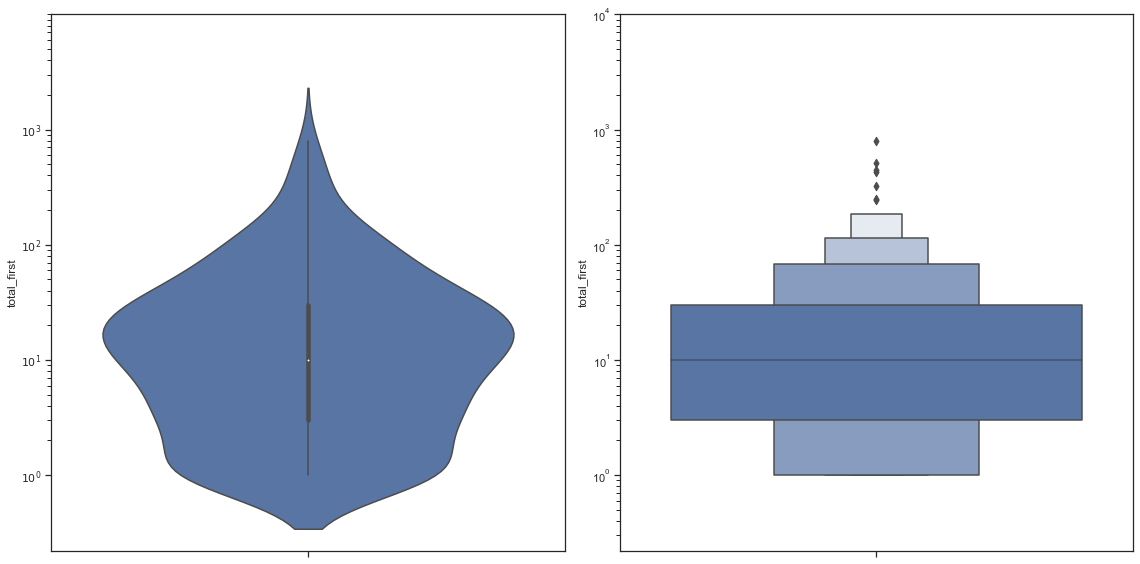

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np

sns.set_style('ticks')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

sns.violinplot(y=np.log10(first_issues_count['total_first']), ax=ax1)
major_ticks = np.arange(np.floor(np.log10(first_issues_count['total_first']).min()), np.log10(first_issues_count['total_first']).max() + 1)
ax1.yaxis.set_ticks(major_ticks, minor=False)
ax1.yaxis.set_ticks([np.log10(x) for p in major_ticks for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
ax1.yaxis.set_major_formatter(StrMethodFormatter("$10^{{{x:.0f}}}$"))

ax2.set_yscale('log')
sns.boxenplot(y=first_issues_count['total_first'], ax=ax2)
ymin, ymax = ax1.get_ylim()
ax2.set_ylim(10**ymin, 10**ymax)

plt.tight_layout()
plt.show()

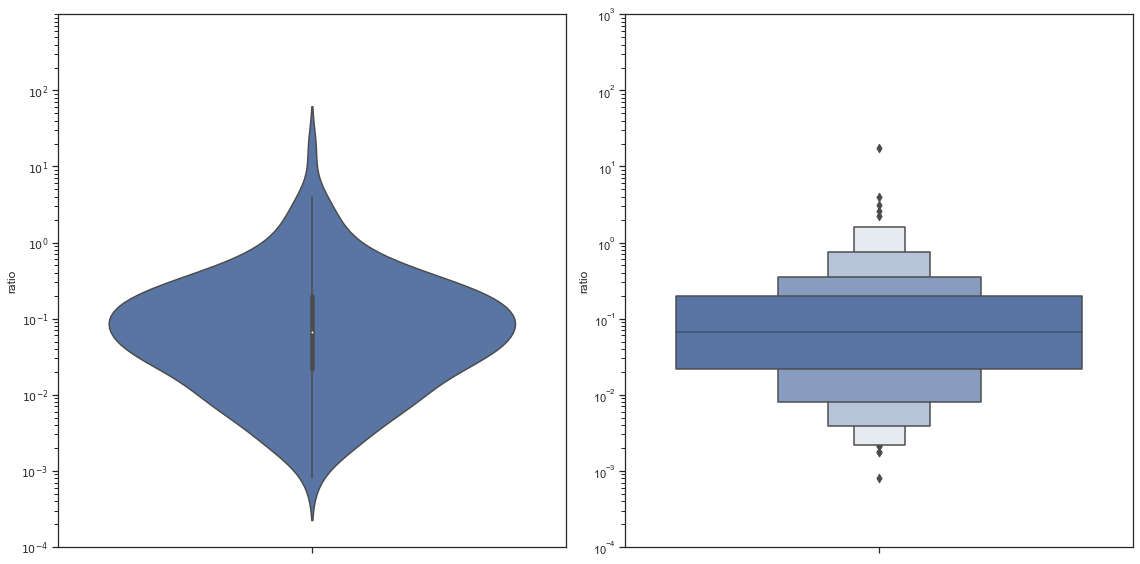

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np

sns.set_style('ticks')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

sns.violinplot(y=np.log10(all_first_count['ratio']), ax=ax1)
major_ticks = np.arange(np.floor(np.log10(all_first_count['ratio']).min()), np.log10(all_first_count['ratio']).max() + 1)
ax1.yaxis.set_ticks(major_ticks, minor=False)
ax1.yaxis.set_ticks([np.log10(x) for p in major_ticks for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
ax1.yaxis.set_major_formatter(StrMethodFormatter("$10^{{{x:.0f}}}$"))

ax2.set_yscale('log')
sns.boxenplot(y=all_first_count['ratio'], ax=ax2)
ymin, ymax = ax1.get_ylim()
ax2.set_ylim(10**ymin, 10**ymax)

plt.tight_layout()
plt.show()